In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

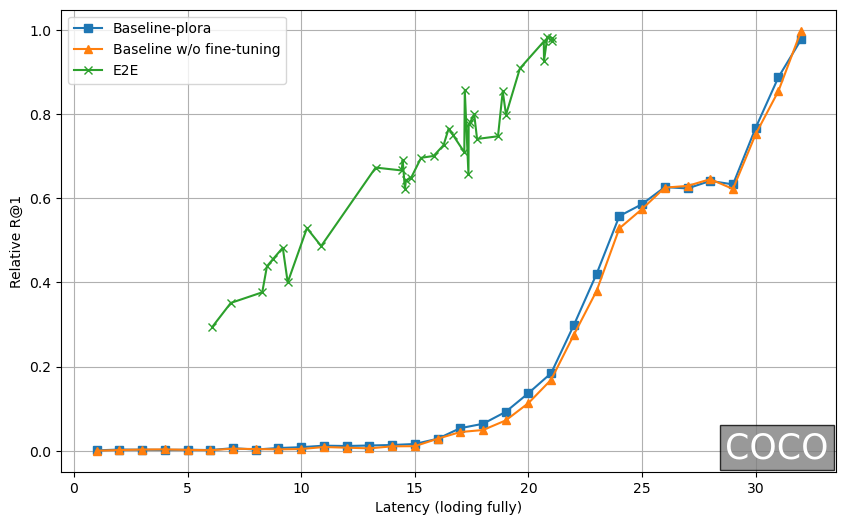

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '../data/processed_e2e_results_coco.csv'
data = pd.read_csv(file_path)

# Ensure all values in 'Tensor' and 'Accuracy' are numeric
data['Tensor'] = pd.to_numeric(data['Tensor'], errors='coerce')
data['Accuracy'] = pd.to_numeric(data['Accuracy'], errors='coerce')

# Filter the data for 'Baseline-trunk-lora' and 'Dynamic'
baseline_trunk_lora = data[data['Type'] == 'Baseline-trunk-lora']
baseline_plora = data[data['Type'] == 'Baseline-plora']
e2e_q20 = data[(data['Type'] == 'E2E') & (data['Q'] == 20.0)]

# Group by 'Tensor' and get the max 'Accuracy' for each group
baseline_trunk_lora_max = baseline_trunk_lora.groupby('Tensor')['Accuracy'].max().reset_index()
baseline_plora_max = baseline_plora.groupby('Tensor')['Accuracy'].max().reset_index()
e2e_q20_max = e2e_q20.groupby('Tensor')['Accuracy'].max().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
# plt.plot(baseline_trunk_lora_max['Tensor'], baseline_trunk_lora_max['Accuracy'], label='Baseline-trunk-lora', marker='o')
plt.plot(baseline_plora_max['Tensor'], baseline_plora_max['Accuracy'], label='Baseline-plora', marker='s')
plt.plot(e2e_q20_max['Tensor'], e2e_q20_max['Accuracy'], label='E2E', marker='x')

plt.xlabel('Latency (loding fully)')
plt.ylabel('Relative R@1')
# plt.title('Accuracy vs Tensor')
plt.legend()
plt.grid(True)

# Add tag in the bottom right corner
tag_text = "COCO"
plt.text(0.99, 0.015, tag_text, horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, 
         fontsize=25, color='white', bbox=dict(facecolor='gray', alpha=0.8))

plt.savefig('../figs/eval-e2e-perf.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [6]:
baseline_plora_max['Tensor']

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
23    24.0
24    25.0
25    26.0
26    27.0
27    28.0
28    29.0
29    30.0
30    31.0
31    32.0
Name: Tensor, dtype: float64

In [7]:
baseline_plora_max['Accuracy']

0     0.0008
1     0.0028
2     0.0024
3     0.0020
4     0.0024
5     0.0016
6     0.0060
7     0.0028
8     0.0064
9     0.0084
10    0.0120
11    0.0112
12    0.0124
13    0.0136
14    0.0160
15    0.0284
16    0.0536
17    0.0640
18    0.0924
19    0.1368
20    0.1844
21    0.2988
22    0.4204
23    0.5576
24    0.5860
25    0.6264
26    0.6232
27    0.6412
28    0.6328
29    0.7676
30    0.8876
31    0.9772
Name: Accuracy, dtype: float64